## Understanding xG by Match Segments (Expected Goals by Time Intervals)
### Premier League Game between Southampton y Bournemouth


In this analysis, I work with xG (Expected Goals) rather than actual goals.
xG represents the quality of chances a team creates, based on factors such as shot location, angle, pressure, and type of play. It tells us how many goals a team should have scored according to the probability of each shot.

When we calculate xG by match segments, we divide the match into time intervals (for example 0–15, 15–30, 30–45, 45–60, 60–75, 75–90 minutes) and compute the xG generated in each segment.

This allows us to understand:

1. Which team dominated different phases of the match
2. When a team created more dangerous chances
3. Whether a team “deserved” more based on chance quality, even if they did not score

In short, xG by segments does not measure actual goals.
It measures performance and “deservedness” throughout the match, using the quality of chances created.

In [1]:
# Install libraries

!pip install mplsoccer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 3.5 MB/s eta 0:00:00


In [2]:
# import libraries 

import pandas as pd
import seaborn as sns
from mplsoccer import Pitch
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from scipy import stats

In [3]:
df = pd.read_csv("/kaggle/input/xgoals-futbol/xgtutorial-2.csv")
df.head()

,Unnamed: 0,minute,team,xG,player,result
0,0,1,Southampton,0.105402,Nathan Redmond,BlockedShot
1,1,2,Southampton,0.136320,Jan Bednarek,BlockedShot
2,2,2,Southampton,0.037217,Oriol Romeu,BlockedShot
3,3,2,Southampton,0.021404,James Ward-Prowse,BlockedShot
4,4,3,Southampton,0.066363,Pierre-Emile Højbjerg,BlockedShot


## Now we have to...

1.  Select the team
2.  Determine which was the xG of each team in each minute

In [4]:
# Configure the dataset.
# Create lists

away_xG = [0]
host_xG = [0]
away_min = [0]
host_min = [0]

### Expected Goals (xG) Accumulation by Team

This code calculates the **cumulative xG** for each team in a match.

1. **Define teams**  
   We assign which team is the away team and which is the home team:
   ```python
   away_team = "Bournemouth"
   host_team = "Southampton"


In [5]:
# Identify the teams

away_team = "Bournemouth"
host_team = "Southampton"

### Separate xG and minutes by team
Loop through the dataframe and store the xG values and minutes for each team:

In [6]:
for x in range(len(df['xG'])):
    if df['team'][x] == away_team:
        away_xG.append(df['xG'][x])
        away_min.append(df['minute'][x])
    if df['team'][x] == host_team:
        host_xG.append(df['xG'][x])
        host_min.append(df['minute'][x])


# print(away_xG,'away_xG "\n"')
# print(host_xG,'host_xG "\n"')
# print(away_min,'away_min "\n"')
# print(host_min,'host_min "\n"')

### Calculate cumulative xG

Define a simple function to get the cumulative sum of xG for each team:

In [7]:
# This will give us the sum of the numbers in our lists

def nums_acumulative_sum(num_list):
    acumulado = []
    total = 0
    for n in num_list:
        total += n
        acumulado.append(total)
    return acumulado

'''
away_acumulative = [0.1, 0.4, 0.7, 1.2]
host_acumulative = [0.2, 0.3, 0.9]
'''
away_acumulative = nums_acumulative_sum(away_xG)
host_acumulative = nums_acumulative_sum(host_xG)

### Get total xG per team
The last value of the cumulative list represents the total xG for each team:

In [8]:
away_last = round(away_acumulative[-1],2)
print(away_last,'away_last')

host_last = round(host_acumulative[-1],2)
print(host_last,'host_last')

2.63 away_last
2.97 host_last


#### The code separates data by team, calculates cumulative xG, and provides the total expected goals for each team.
 This is useful for visualizing which team created more scoring chances over the match.

 ### Plot the xG Segments

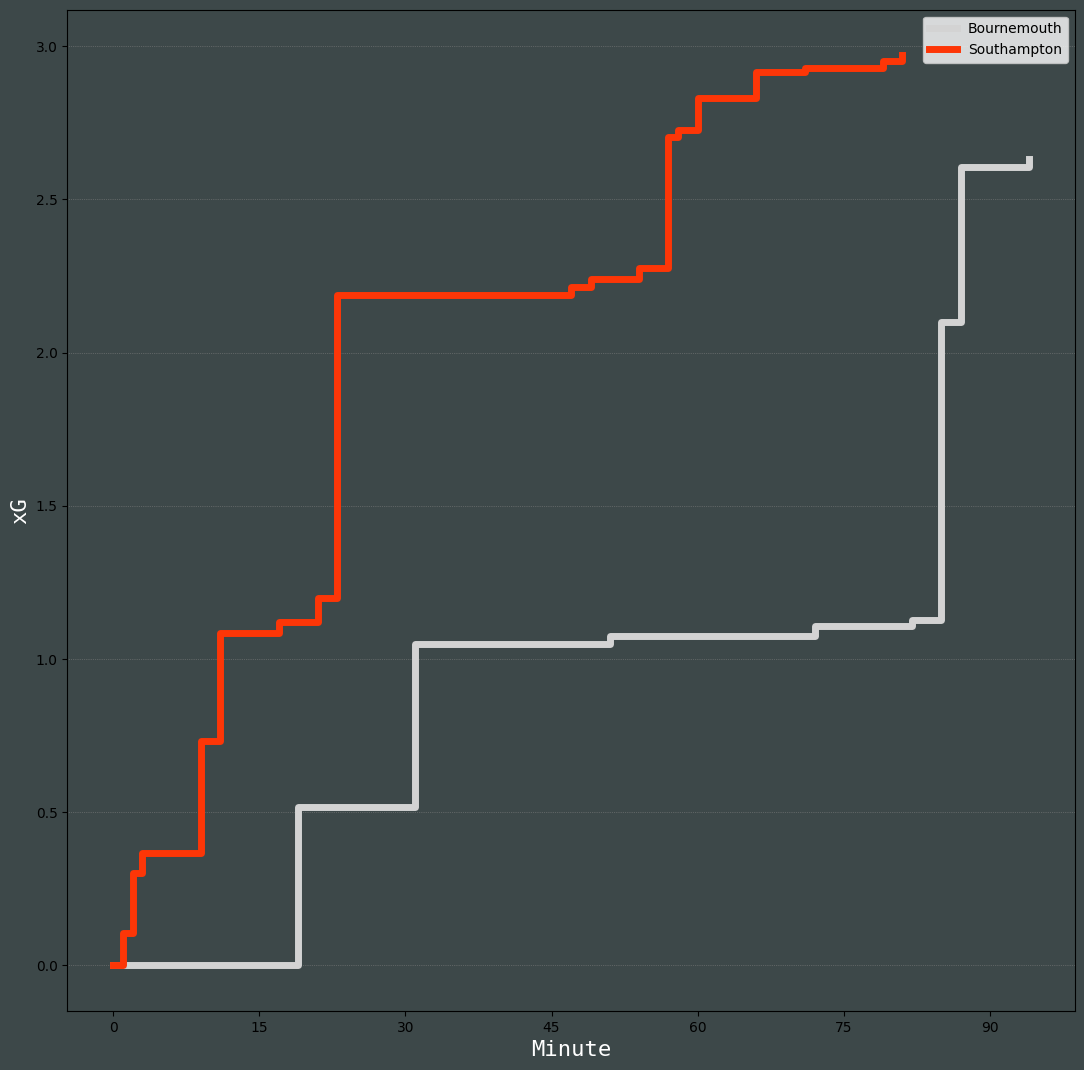

In [9]:
fig, ax = plt.subplots(figsize=(13,13))

fig.set_facecolor('#3d4849')
ax.patch.set_color('#3d4849')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted', 
        lw=.5, 
        color='grey',
        axis='y',
        zorder=1)

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minute",
          fontname='monospace',
          color='white',
          fontsize='16')

plt.ylabel("xG",
           fontname='monospace',
           color='white',
           fontsize='16')

ax.step(x=away_min, 
        y=away_acumulative,
       color='#d3d3d3',
       label=away_team,
       linewidth=5,
       where='post')

ax.step(x=host_min, 
        y=host_acumulative,
       color='#fd3607',
       label=host_team,
       linewidth=5,
       where='post')

plt.legend()